In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
import warnings

warnings.filterwarnings(action='ignore') 


#qqplot
from scipy.stats import probplot
import scipy.stats as stats
#정규성
from scipy import stats

# anova
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
pd.set_option('display.max_row', 5000)
pd.set_option('display.max_columns', 100)

from matplotlib import font_manager, rc
import matplotlib
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 생육 데이터
# 넓은들_송태근,제일_황종운 제외
sang_list =[
    
    #'대수농장_이중범_생육',
    '로즈밸리_정병두_생육',
    '마이산토마토_강성백_생육',
    '민수네토마토_강윤성_생육',
    '바구리봉_임윤호_생육',
    '번영농장_권현자_감마_생육',
    '번영농장_권현자_레드250_생육',
    #'봉대농장_조봉대_생육',
    '오마이토마토_오길택_생육',
    #'으뜸_김재원_생육',
    '장수파프리카_김인기_생육',
    '지수농장_김경환_생육',
    '지평선농원_안경엽_생육',
    '지평선농장_안상천_생육',
    '천천팜_송완섭_생육',
    '태봉_하수용_생육',
    '털보_박병준-생육',
    '하늘아래_김선배_생육',
    '해오름_한동근_생육',
    '햇살_김영호_생육',
    '현가농장_김대만_생육',
    '희망농원_허덕문_생육',
]

In [4]:
# 환경 데이터
env_list =[
    '대수농장_이중범_환경',
    '로즈밸리_정병두_환경',
    '마이산토마토_강성백_환경',
    '민수네토마토_강윤성_환경',
    '바구리봉_임윤호_환경',
    '번영농장_권현자_환경',
    '번영농장_권현자_환경',
    '봉대농장_조봉대_환경',
    '오마이토마토_오길택_환경',
    '으뜸_김재원_환경',
    '장수파프리카_김인기_환경',
    '지수농원_김경환_환경',
    '지평선농원_안경엽_환경',
    '지평선농장_안상천_환경',
    '천천팜_송완섭_환경',
    '태봉_하수용_환경',
    '털보농장_박병준_환경',
    '하늘아래_김선배_환경',
    '해오름_한동근_환경',
    '햇살농장_김영호_환경',
    '현가농장_김대만_환경',
    '희망농원_허덕문_환경'
]

# 생육_농가별 생장길이 비교

In [5]:
sang_data=pd.DataFrame()
for s in sang_list:
    n = 'C:\\농업기술원\\1차\\2018\\2018-2019 토마토_생육(원본)/'+s+'.xlsx'
    col = ['농가명', 'Date', 'Year', 'Month', 'Day', 'Week', 'WeekNum', 'Sample', '생장길이', '화방높이', '줄기굵기']
    sang = pd.read_excel(n)
    sang = sang[col]
    sang_data=sang_data.append(sang)
sang_data=sang_data[~sang_data['생장길이'].isnull()]
sang_data=sang_data.reset_index(drop=True)

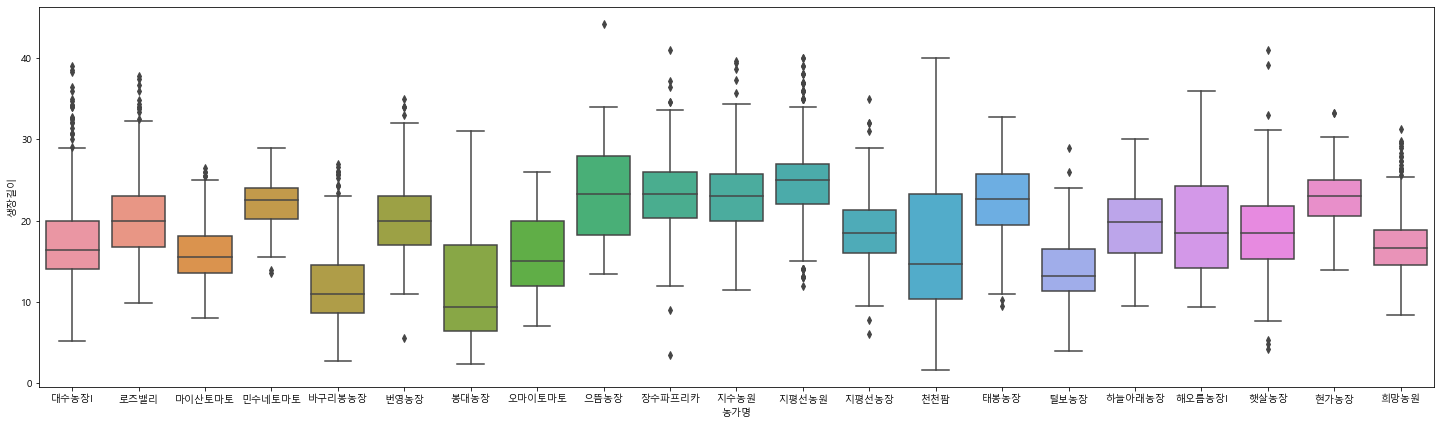

In [106]:
plt.figure(figsize=(25,7))
sns.boxplot(data = sang_data, x='농가명',y='생장길이')

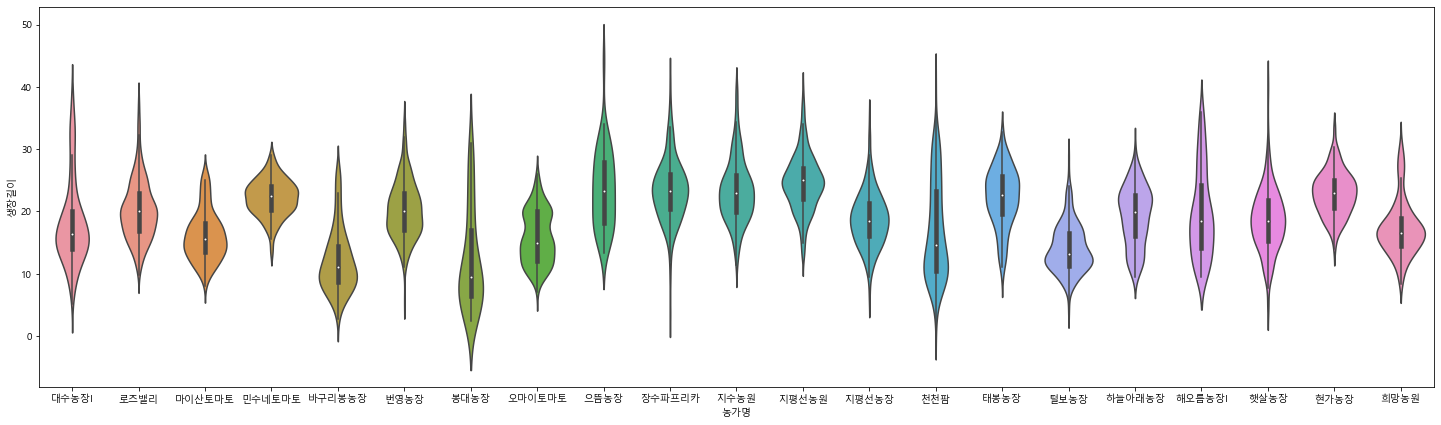

In [96]:
plt.figure(figsize=(25,7))
sns.violinplot(data = sang_data, x='농가명',y='생장길이')

### 정규성 검정

In [122]:
for i in sang_list:
    stats.probplot(list(sang_data[sang_data['농가명']==i]['생장길이']))

In [125]:
stats.probplot(list(sang_data[sang_data['농가명']=='로즈밸리']['생장길이']))


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 444 and the array at index 1 has size 1

In [97]:
farm_name = sang_data['농가명'].unique()

In [98]:
norm_sang=pd.DataFrame()

In [99]:
d=dict()
for i in farm_name:
    df = sang_data[sang_data['농가명']==i]
    shapiro_test = stats.shapiro(df['생장길이'])
    p=shapiro_test.pvalue
    d[i]=p
    

In [100]:
d

{'대수농장I': 9.093714670171948e-11,
 '로즈밸리': 3.583842556054151e-08,
 '마이산토마토': 6.32887213214417e-06,
 '민수네토마토': 0.5371251106262207,
 '바구리봉농장': 1.621973133580923e-08,
 '번영농장': 0.000276628794381395,
 '봉대농장': 0.0008204238838516176,
 '오마이토마토': 4.673889998230152e-05,
 '으뜸농장': 0.05998803302645683,
 '장수파프리카': 0.005451698787510395,
 '지수농원': 0.0007031303830444813,
 '지평선농원': 1.7773373883755994e-07,
 '지평선농장': 0.035050585865974426,
 '천천팜': 1.39294002110546e-07,
 '태봉농장': 0.007064556237310171,
 '털보농장': 3.327542799524963e-05,
 '하늘아래농장': 0.0016306708566844463,
 '해오름농장I': 4.442038516572211e-06,
 '햇살농장': 0.00047278436250053346,
 '현가농장': 0.7133903503417969,
 '희망농원': 2.4207603033232772e-08}

In [101]:
norm_sang=pd.DataFrame.from_dict(d,orient='index',columns=['p'])

In [102]:
norm_sang[norm_sang['p']>0.05]

,p
민수네토마토,0.537125
으뜸농장,0.059988
현가농장,0.713390


In [103]:
model = ols('생장길이 ~ C(농가명)', sang_data).fit()
print(anova_lm(model))

              df         sum_sq      mean_sq           F  PR(>F)
C(농가명)      20.0   61794.391363  3089.719568  124.117738     0.0
Residual  5040.0  125463.022732    24.893457         NaN     NaN


pvalue가 0이기 때문에 모든 그룹에 있어 평균이 같은 것은아니다.
그렇기 때문에 사후검정을 해보자

### Tukey

In [ ]:
posthoc = pairwise_tukeyhsd(sang_data['생장길이'], sang_data['농가명'], alpha=0.05)
print(posthoc)

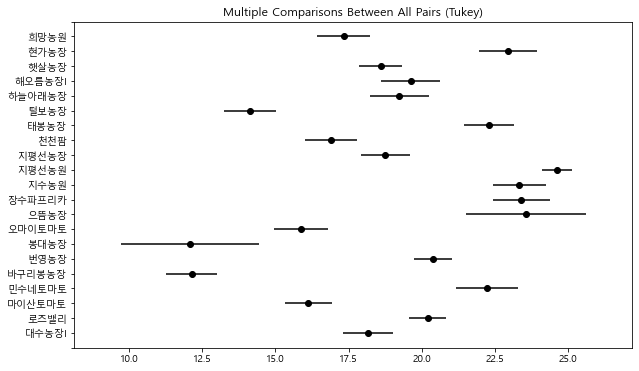

In [105]:
fig = posthoc.plot_simultaneous()

### Duncan

### Scheffe

# 농가별 주차별 온도 변화 박스플랏

In [16]:
def sang_data_load(sang_farm_name):
    n = 'C:\\농업기술원\\1차\\2018\\2018-2019 토마토_생육(원본)/'+sang_farm_name+'.xlsx'
    col = ['농가명', 'Date', 'Year', 'Month', 'Day', 'Week', 'WeekNum', 'Sample', '생장길이', '화방높이', '줄기굵기']
    sang = pd.read_excel(n)
    sang = sang[col]
    return sang

In [17]:
def env_data_load(env_farm_name):
    n = 'C:\\농업기술원\\1차\\2018\\2018-2019 토마토_환경(원본)/'+env_farm_name+'.xlsx'
    col = ['date', '내부온도', '내부습도', '지온', '지습', '이슬점', 'CO2', '외부온도', '풍속', '일사량', '누적일사량','강우', '포화수분', '절대습도', '수분부족분', '이중창환기온도', '환기온도', '난방온도']
    env = pd.read_excel(n)
    env = env[col]
    return env

In [22]:
def add_weeknum(sang_df):
    sang_df['diff']=sang_df['WeekNum'].shift(1)
    sang_df['diff2']=sang_df['WeekNum']-sang_df['diff']
    
    num=-1
    test_week=[]
    for i in range(len(sang_df)):
        if sang_df['diff2'].loc[i]!=0:
            num+=1
            test_week.append(num)
        else:
            test_week.append(num)
    del sang_df['diff']
    del sang_df['diff2']
    return test_week

In [29]:
def env_add_Date(env_df,생육조사기간):
    df=pd.DataFrame()
    for i in range(len(생육조사기간)-1):
        start_i = 생육조사기간[i]+timedelta(hours=12)
        end_i = 생육조사기간[i+1]+timedelta(hours=12)

        df2 = env_df[(env_df['date']>=start_i) & (env_df['date']<end_i)]
        df2['Date']=생육조사기간[i+1]


        df=pd.concat([df,df2])
    return df

In [30]:
def match_test_weeknum(sang_data,env_data):
    dic=dict(zip(sang_data['Date'],sang_data['test_weeknum']))
    result=env_data.replace({"Date":dic})["Date"]
    return result

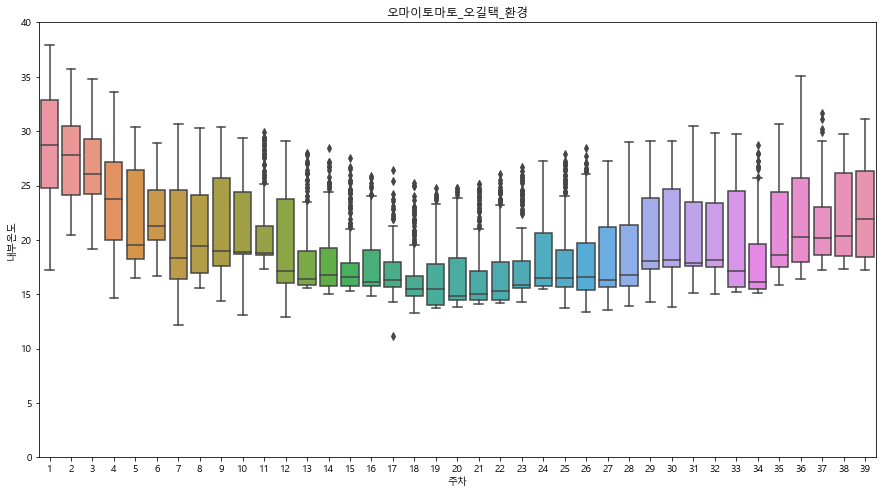

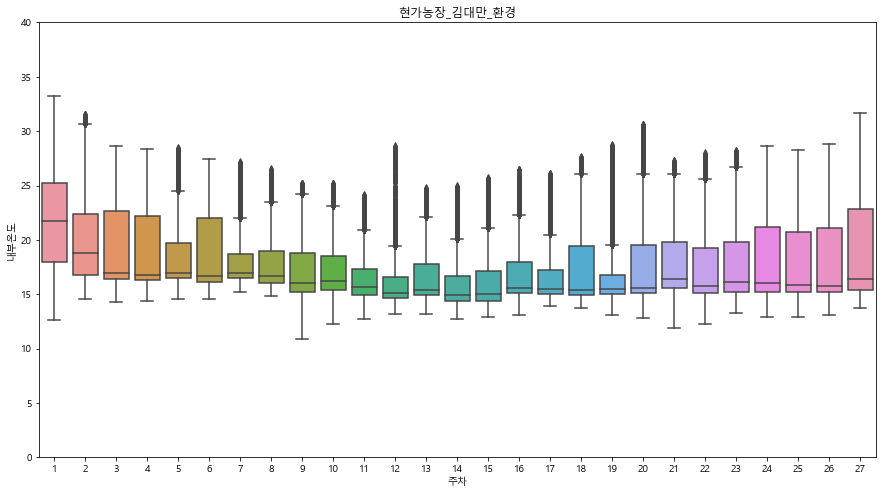

In [55]:
# 월별 cat1 별 판매 횟수
sang_data=pd.DataFrame()
for s,e in zip(['오마이토마토_오길택_생육','현가농장_김대만_생육'],['오마이토마토_오길택_환경','현가농장_김대만_환경']):
    
    # 한 농장 snag 로드
    sang_data = sang_data_load(s)
    
    # 한 농장 env 로드
    env_data = env_data_load(e)
    
    # 한 농장에 주차 추가
    sang_data['test_weeknum']=add_weeknum(sang_data)
    
    # 환경에 Date컬럼 추가
    생육조사기간=sorted(list(set(list(sang_data['Date']))))
    env_data=env_add_Date(env_data,생육조사기간)

    # 환경 데이터에 주차 컬럼 추가
    env_data['주차']=match_test_weeknum(sang_data,env_data)


    # 그림 그리기
    plt.figure(figsize=(15,8))
    plt.title(e) 
    ax=sns.boxplot(data=env_data,x='주차',y='내부온도')
    ax.set_ylim([0, 40])
    
    plt.show()


In [40]:
sang_data=sang_data[~sang_data['생장길이'].isnull()]
sang_data=sang_data.reset_index(drop=True)

In [42]:
sang_data.head(100)

,농가명,Date,Year,Month,Day,Week,WeekNum,Sample,생장길이,화방높이,줄기굵기,test_weeknum
0,희망농원,2018-08-27,2018,8,27,2,35,1,29.2,18.5,11.76,0
1,희망농원,2018-08-27,2018,8,27,2,35,4,29.6,22.0,10.61,0
2,희망농원,2018-08-27,2018,8,27,2,35,5,31.3,19.1,11.59,0
3,희망농원,2018-08-27,2018,8,27,2,35,6,27.4,17.5,11.60,0
4,희망농원,2018-09-10,2018,9,10,2,37,1,26.9,23.8,11.72,1
5,희망농원,2018-09-10,2018,9,10,2,37,2,28.3,15.4,12.43,1
6,희망농원,2018-09-10,2018,9,10,2,37,3,28.9,12.6,11.83,1
7,희망농원,2018-09-10,2018,9,10,2,37,4,28.0,23.0,11.45,1
8,희망농원,2018-09-10,2018,9,10,2,37,5,29.8,17.8,10.85,1
9,희망농원,2018-09-10,2018,9,10,2,37,6,25.6,13.2,11.84,1


In [39]:
env_data.head(200)

,date,내부온도,내부습도,지온,지습,이슬점,CO2,외부온도,풍속,일사량,누적일사량,강우,포화수분,절대습도,수분부족분,이중창환기온도,환기온도,난방온도,Date,주차
126,2018-08-12 12:00:00,34.5,76.2,90,NaN,NaN,305,33.0,3,862,1481.41,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
127,2018-08-12 13:00:00,33.0,72.4,90,NaN,NaN,313,31.3,4,209,1482.18,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
128,2018-08-12 14:00:00,32.0,75.0,90,NaN,NaN,312,32.2,4,218,1482.96,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
129,2018-08-12 15:00:00,32.5,76.3,90,NaN,NaN,309,33.4,1,226,1483.75,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
130,2018-08-12 16:00:00,33.7,74.1,90,NaN,NaN,301,32.8,2,257,1484.68,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
131,2018-08-12 17:00:00,34.2,66.1,90,NaN,NaN,301,32.5,2,435,1486.27,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
132,2018-08-12 18:00:00,33.9,64.5,90,NaN,NaN,305,31.9,2,295,1487.39,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
133,2018-08-12 19:00:00,31.3,71.4,90,NaN,NaN,326,29.4,1,43,1487.56,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
134,2018-08-12 20:00:00,28.3,82.2,90,NaN,NaN,354,26.2,0,0,1487.56,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
135,2018-08-12 21:00:00,27.3,85.7,90,NaN,NaN,366,25.3,0,0,1487.56,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-19,1
